<a href="https://colab.research.google.com/github/Dkiranmayee25/Clustering-with-K-Means/blob/main/Task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


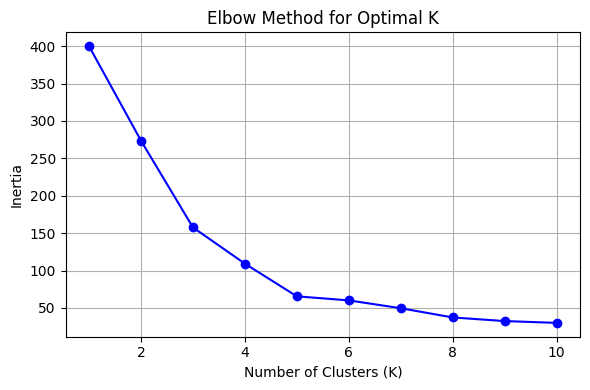

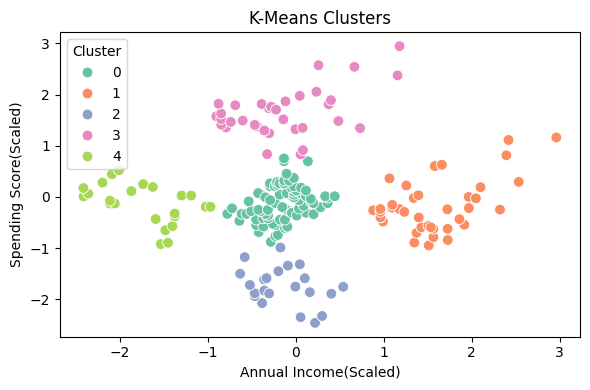

Silhouette Score for K=5: 0.5547


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('/content/Mall_Customers.csv')
print("Dataset Shape:", df.shape)
print(df.head())

features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.tight_layout()
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['Cluster'], palette='Set2', s=60)
plt.title('K-Means Clusters')
plt.xlabel('Annual Income(Scaled)')
plt.ylabel('Spending Score(Scaled)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

score = silhouette_score(scaled_features, clusters)
print(f"Silhouette Score for K={optimal_k}: {score:.4f}")
